In [4]:
using Plots, Statistics, NaNStatistics, LinearAlgebra, Serialization, ParticleFilters, StatsBase, Distributions

include("../utils/import.jl")
using .Import

include("../utils/figs.jl")
using .Figs

fig_directory = "../fig/"
filetype = ".png"
function save(name::String)
    savefig(fig_directory*name*filetype)
end

save (generic function with 1 method)

In [9]:
# Experiment Parameters
runs = 25
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]
pomdp_name, naive_name, random_name, passive_name = "ATS", "Naive", "Random", "Passive";
p_md1_name, p_md5_name, pa_md1_name, pa_md5_name = "ATS - depth 1", "ATS - depth 5", "Passive - depth 1", "Passive - depth 5"
pc_name, pac_name = "ATS - countdown", "Passive - countdown"

# Plotting Parameters
labels = [pomdp_name p_md1_name p_md5_name passive_name pa_md1_name pa_md5_name random_name]
discount = 0.999

# ATS
pomdp_expIDs = ["2337_"*x for x in ["02171", "025226", "034147", "041545", "045038", "052838", "062743", "072613", "081546", "102236", "112112", "115510", "12299", "142632", "150540", "160655", "16438", "181329", "20018", "203722"]]

# ATS - short (max_depth=1)
p_md1_expIDs = ["2333_1"*x for x in ["7240", "72756", "73137", "7368", "74056", "74438", "74856", "81231", "8179", "82150", "82617", "82956", "83430", "83812", "8432", "84657", "85145", "85618", "90047", "90515"]]

# ATS - short (max_depth=5)
p_md5_expIDs = ["2334_"*x for x in ["113251", "114138", "115020", "115924", "12062", "135456", "140439", "141121", "141931", "142818", "143447", "144117", "144954", "145624", "150528", "164610", "165642", "175237", "193439", "205645"]]

# ATS - countdown (max_depth=5)
pc_expIDs1 = ["23315_0"*x for x in ["41650", "65517", "83847", "85146", "90542", "91723", "92810", "94059", "9556"]]
pc_expIDs2 = ["23315_1"*x for x in ["00746", "02050", "0350", "0499", "10324", "14626", "20014", "21317", "22554", "25759", "31056"]]
pc_expIDs = cat(pc_expIDs1, pc_expIDs2, dims=1)

# ATS - brief (100 steps)
pb_expIDs = ["23316_10"*x for x in ["2849", "2920", "2957", "3035", "316", "3136", "3213", "3243", "3315", "3351", "3424", "3455", "3526", "361", "3636", "376", "3741", "3815", "3852", "3922"]]

# ATS - countdown - brief (100 steps)
pcb_expIDs = ["23316_10"*x for x in ["1129", "1217", "134", "1350", "1437", "1522", "168", "1655", "1735", "1822", "198", "1956", "2043", "2124", "2210", "2252", "2341", "2429", "2518", "2618"]]
# pcb_expIDs = ["23321_16377", "23321_163742", "23321_163817", "23321_163852", "23321_163922", "23321_163956", "23321_164031", "23321_16416", "23321_164141", "23321_164216"]

# ATS - undiscounted (also countdown, max_depth=5, brief)
pcbu_expIDs = ["23323_111646", "23323_111821", "23323_111940", "23323_112111", "23323_112245", "23323_11241", "23323_112531", "23323_112645", "23323_11282", "23323_112932", "23323_113051", "23323_113226", "23323_113357", "23323_113532", "23323_113647", "23323_113818", "23323_113936", "23323_114050", "23323_114227", "23323_114359"]

# ATS - arm-only rollout (also undiscounted, countdown, max_depth=5, brief)
pcbua_expIDs = ["23327_141351", "23327_141523", "23327_14173", "23327_141838", "23327_142012", "23327_142145", "23327_142327", "23327_14259", "23327_142648", "23327_142828", "23327_14304", "23327_143140", "23327_143318", "23327_143435", "23327_143553", "23327_143711", "23327_143857", "23327_144031", "23327_14422", "23327_144334"]
# pcbua_expIDs = ["23329_101838", "23329_102011", "23329_102125", "23329_102259", "23329_102448", "23329_102632", "23329_10288", "23329_102949", "23329_103124", "23329_10336", "23329_103422", "23329_103551", "23329_103722", "23329_103851", "23329_104024", "23329_104158", "23329_104314", "23329_104445", "23329_104615", "23329_104727"]

# Passive
passive_expIDs1 = ["base_rand_B_2336_"*x for x in ["121423", "125217", "141717", "155857", "163552", "171248", "174628", "182416", "185750", "193346", "200547", "214059", "22179", "225243", "231944", "234150"]]
passive_expIDs2 = ["base_rand_B_2337_0"*x for x in ["01421", "04659", "11932", "1556"]]
passive_expIDs = cat(passive_expIDs1, passive_expIDs2, dims=1)

# Passive - short (max_depth=1)
pa_md1_expIDs1 = ["base_rand_B_2333_16"*x for x in ["3539", "3810", "4041", "4234", "4431", "474", "4859", "5131", "5326", "5558", "5751"]]
pa_md1_expIDs2 = ["base_rand_B_2333_17"*x for x in ["0025", "031", "0552", "088", "1056", "1332", "1612", "1850", "2130"]]
pa_md1_expIDs = cat(pa_md1_expIDs1, pa_md1_expIDs2, dims=1)

# Passive - short (max_depth=5)
pa_md5_expIDs1 = ["base_rand_B_2333_2"*x for x in ["23813", "24448", "30512", "35726"]]
pa_md5_expIDs2 = ["base_rand_B_2334_"*x for x in ["000357", "003854", "015120", "021226", "033827", "050025", "062733", "075614", "090133", "10469", "105637", "110327", "11108", "111647", "112135", "11289"]]
pa_md5_expIDs = cat(pa_md5_expIDs1, pa_md5_expIDs2, dims=1)

# Passive - countdown (max_depth=5) (NOTE: might be mistake in implementation)
pac_expIDs1 = ["base_rand_B_23314_"*x for x in ["164632", "16534", "165922", "17041", "171022", "171635", "172739", "180524", "181144", "18342", "185455", "190121", "201328", "211138", "22185", "230457"]]
pac_expIDs2 = ["base_rand_B_23315_0"*x for x in ["01215", "10326", "1581", "32349"]]
pac_expIDs = cat(pac_expIDs1, pac_expIDs2, dims=1)

# Passive - arm-only rollout (also undiscounted, countdown, max_depth=5, brief)
# pacbua_expIDs =

# Random 1 
random_expIDs1 = ["base_rand_act_2336_"*x for x in ["121419", "125213", "141714", "155853", "163548", "171244", "174625", "182413", "185746", "193343", "200543", "214055", "22175", "225239", "231941", "234146"]]
random_expIDs2 = ["base_rand_act_2337_0"*x for x in ["01417", "04656", "11928", "1553"]]
random_expIDs = cat(random_expIDs1, random_expIDs2, dims=1)

# Random 2
random_expIDs1 = ["base_rand_act_23314_"*x for x in ["164628", "16530", "165919", "170357", "171018", "171631", "172735", "180520", "181140", "183359", "185452", "190117", "201324", "211134", "22181", "230453"]]
random_expIDs2 = ["base_rand_act_23315_0"*x for x in ["01211", "10322", "15757", "32345"]]
random_expIDs = cat(random_expIDs1, random_expIDs2, dims=1)

# Import Data
s_p, t_p, a_p, r_p = Import.import_IDs(pomdp_expIDs, runs, directory="..")
s_p1, t_p1, a_p1, r_p1 = Import.import_IDs(p_md1_expIDs, runs, directory="..")
s_p5, t_p5, a_p5, r_p5 = Import.import_IDs(p_md5_expIDs, runs, directory="..")
s_pc, t_pc, a_pc, r_pc = Import.import_IDs(pc_expIDs, runs, directory="..")
s_pb, t_pb, a_pb, r_pb = Import.import_IDs(pb_expIDs, 10, directory="..")
s_pcb, t_pcb, a_pcb, r_pcb = Import.import_IDs(pcb_expIDs, 10, directory="..")
s_pcbu, t_pcbu, a_pcbu, r_pcbu = Import.import_IDs(pcbu_expIDs, 25, directory="..")
s_pcbua, t_pcbua, a_pcbua, r_pcbua = Import.import_IDs(pcbua_expIDs, 25, directory="..")
s_pa, t_pa, a_pa, r_pa = Import.import_IDs(passive_expIDs, runs, directory="..")
s_pa1, t_pa1, a_pa1, r_pa1 = Import.import_IDs(pa_md1_expIDs, runs, directory="..")
s_pa5, t_pa5, a_pa5, r_pa5 = Import.import_IDs(pa_md5_expIDs, runs, directory="..")
s_pac, t_pac, a_pac, r_pac = Import.import_IDs(pac_expIDs, runs, directory="..")
s_r, t_r, a_r, r_r = Import.import_IDs(random_expIDs, runs, directory="..")
;

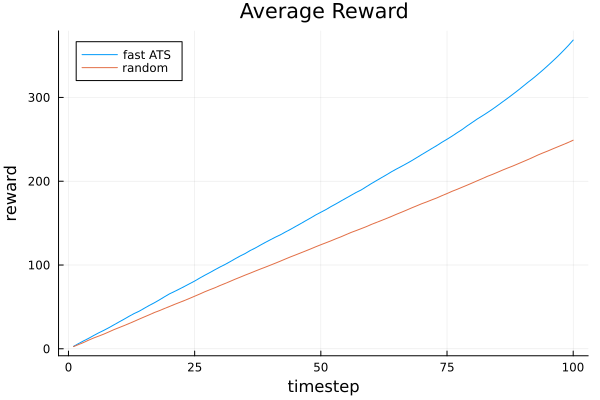

In [11]:
temp = ["23331_125659", "23331_12598", "23331_13016", "23331_130310", "23331_130510", "23331_130718", "23331_130918", "23331_131113", "23331_13139", "23331_13157", "23331_13173", "23331_131858", "23331_13214", "23331_13233", "23331_132512", "23331_132710", "23331_132919", "23331_133119", "23331_133318", "23331_133448"]
s_x, t_x, a_x, r_x = Import.import_IDs(temp, 10, directory="..")
labels_custom = ["fast ATS" "random"]
Figs.plot_cumulative_avg_r_multiple_experiments([r_x, r_r], 1., labels_custom, "Average Reward")


In [8]:
test = ["23329_11375", "23329_11447", "23329_11519", "23329_11587", "23329_120444", "23329_120946", "23329_121448", "23329_122141", "23329_12294", "23329_123620", "23329_124335", "23329_125043", "23329_125756", "23329_130428", "23329_131140", "23329_13194", "23329_132619", "23329_133336", "23329_134156", "23329_134852"]
s_t, t_t, a_t, r_t = Import.import_IDs(test, 25, directory="..")
Figs.plot_proportion_actions_all(a_t, actions, 1, "test")

LoadError: UndefVarError: actions not defined

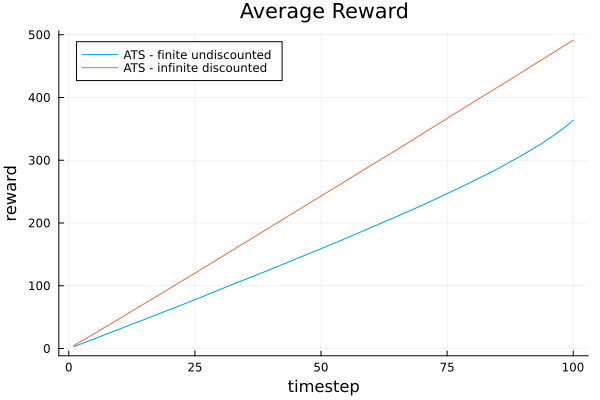

In [267]:
labels_custom = ["ATS - finite undiscounted" "ATS - infinite discounted"]
Figs.plot_cumulative_avg_r_multiple_experiments([r_t, r_p5], 1., labels_custom, "Average Reward")


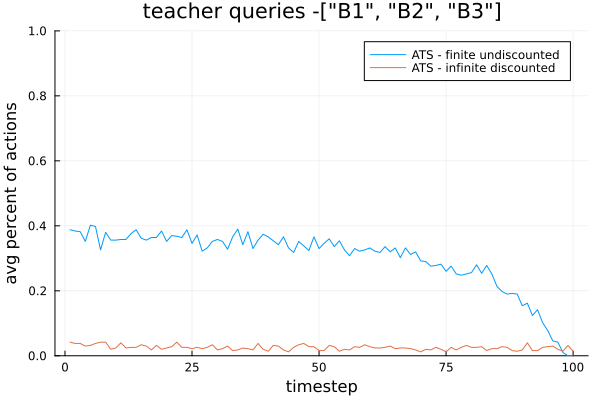

In [270]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a_t, a_p5], ["B1", "B2", "B3"], 1, labels_custom, "teacher queries -")


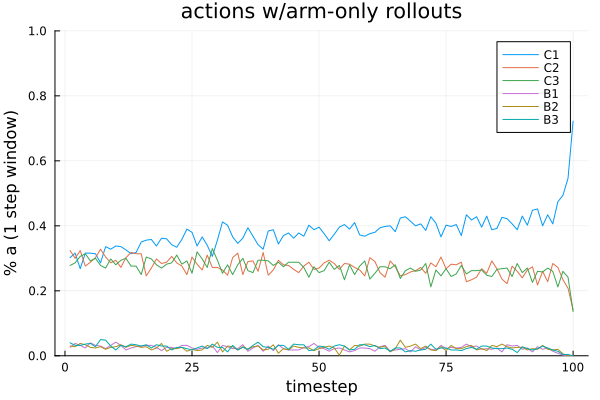

In [251]:
Figs.plot_proportion_actions_all(a_pcbua, actions, 1, "actions w/arm-only rollouts")

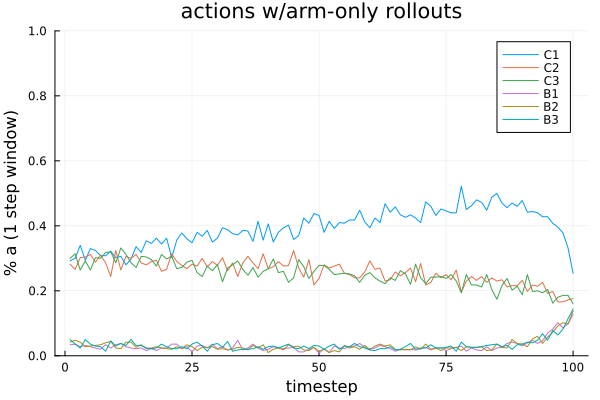

In [210]:
Figs.plot_proportion_actions_all(a_pcbua, actions, 1, "actions w/arm-only rollouts")

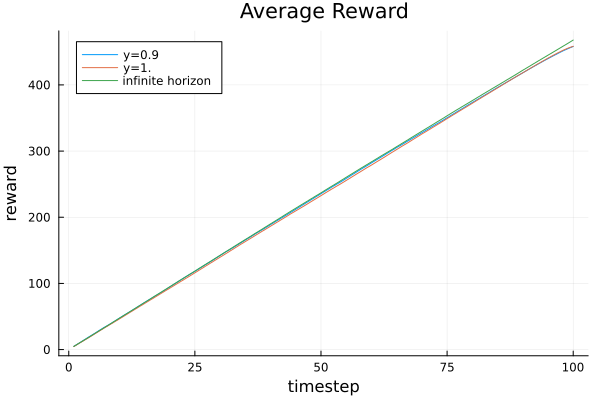

In [191]:
Figs.plot_cumulative_avg_r_multiple_experiments([r_pcb, r_pcbu, r_p5], discount, ["y=0.9" "y=1." "infinite horizon"], "Average Reward")


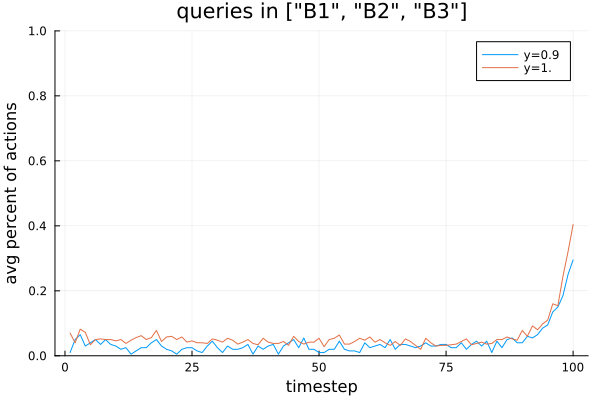

In [201]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a_pcb, a_pcbu], ["B1", "B2", "B3"], 1, ["y=0.9" "y=1." "infinite horizon"], "queries in ")



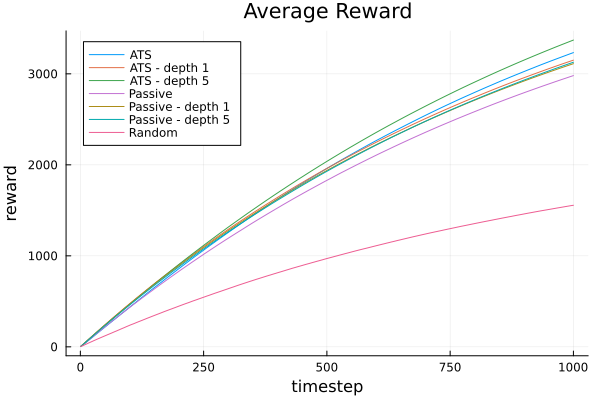

In [38]:
Figs.plot_cumulative_avg_r_multiple_experiments([r_p, r_p1, r_p5, r_pa, r_pa1, r_pa5, r_r], discount, labels, "Average Reward")

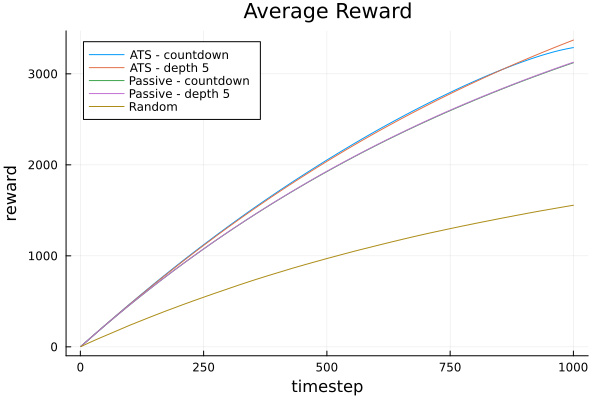

In [39]:
labels = [pc_name p_md5_name pac_name pa_md5_name random_name]
# labels = [pac_name pa_md5_name random_name]
Figs.plot_cumulative_avg_r_multiple_experiments([r_pc, r_p5, r_pac, r_pa5, r_r], discount, labels, "Average Reward")
# Figs.plot_cumulative_avg_r_multiple_experiments([r_pac, r_pa5, r_r], discount, labels, "Average Reward")

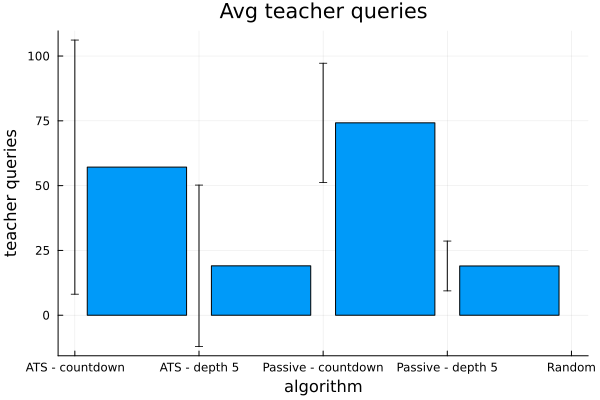

In [40]:
Figs.plot_num_teacher_queries([a_pc, a_p5, a_pa, a_pac], labels, "Avg teacher queries")

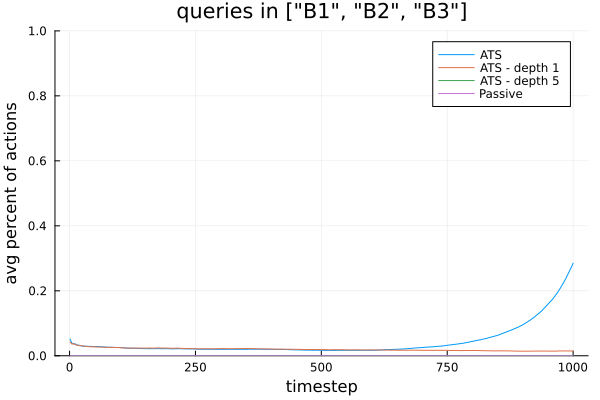

In [158]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a_pc, a_p5, a_pa, a_pac], ["B1", "B2", "B3"], 100, labels, "queries in ")

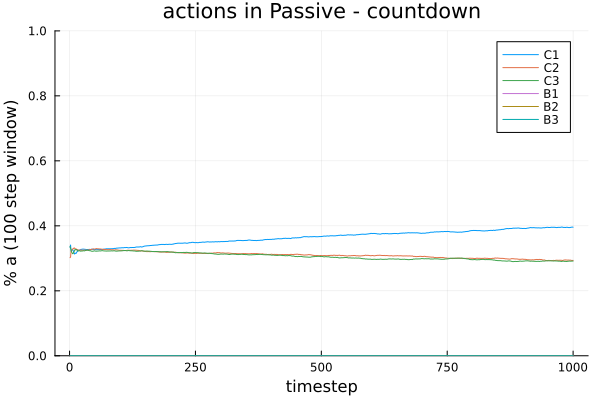

In [44]:
Figs.plot_proportion_actions_all(a_pac, actions, 100, "actions in "*pac_name)

## Short horizon

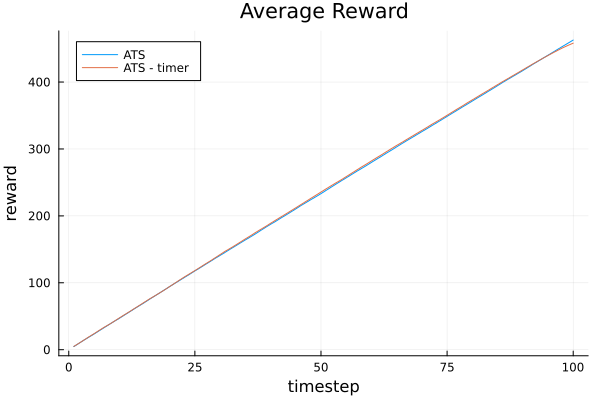

In [45]:
labels = ["ATS" "ATS - timer"]
Figs.plot_cumulative_avg_r_multiple_experiments([r_pb, r_pcb], discount, labels, "Average Reward")

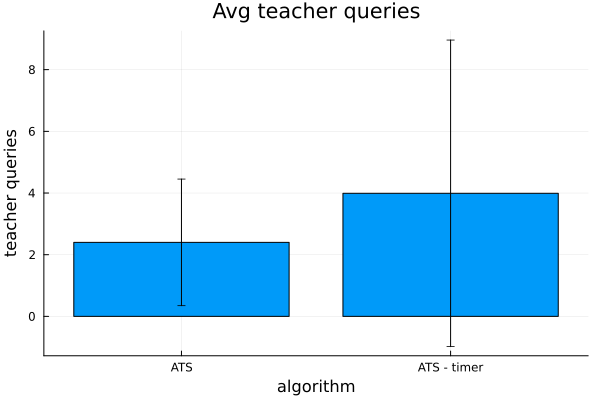

In [46]:
Figs.plot_num_teacher_queries([a_pb, a_pcb], labels, "Avg teacher queries")

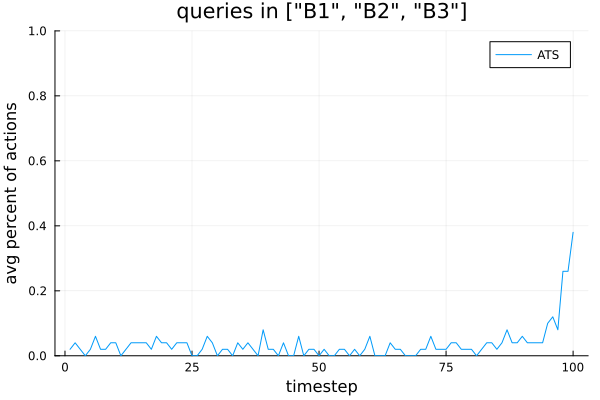

In [175]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a_pcb], ["B1", "B2", "B3"], 1, labels, "queries in ")

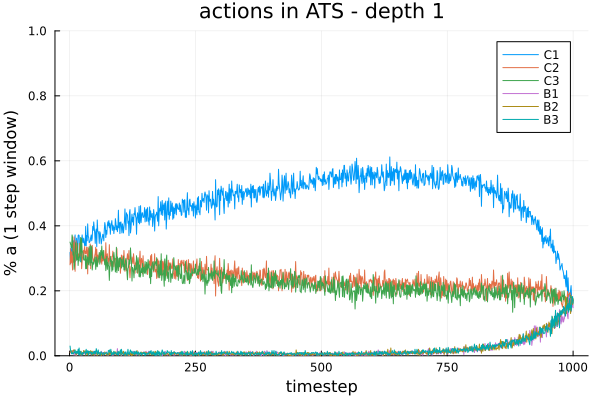

In [209]:
Figs.plot_proportion_actions_all(a_pc, actions, 1, "actions in "*labels[2])

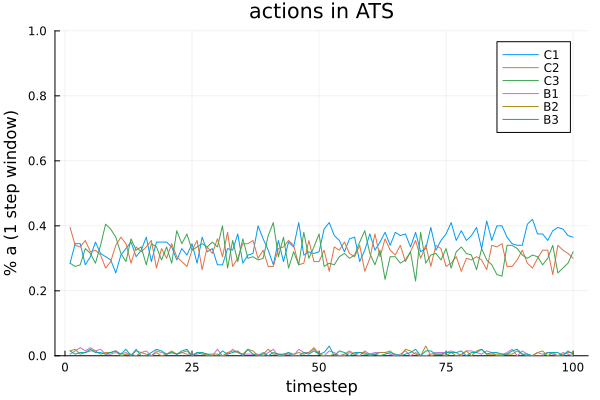

In [49]:
Figs.plot_proportion_actions_all(a_pb, actions, 1, "actions in "*labels[1])

In [150]:
# run that queries teachers a lot at the end
id = pcb_expIDs[7]
# id = pb_expIDs[7]
# ~10s
s, t, a, r, beliefs, final_states, avg_belief = Import.import_experiment(id, 10, ".");

┌ Warning: Skipped marker arg ..
└ @ Plots /Users/rachelfreedman/.julia/packages/Plots/oqtQB/src/args.jl:1224


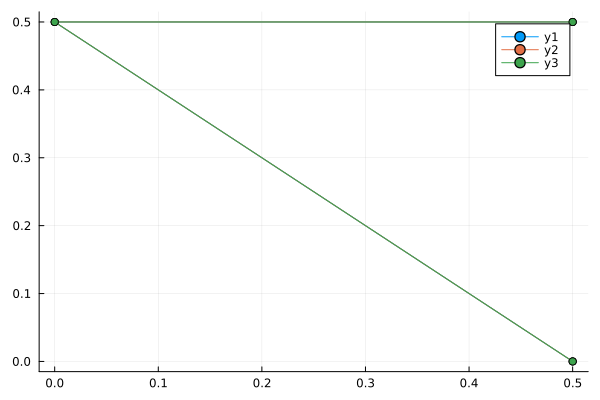

In [172]:
# beliefs: (runs, timesteps) of ParticleCollection{State}
b_last = beliefs[2][end-1]
plot([s.d[1] for s in keys(ParticleFilters.probdict(b_last))], 
    [s.d[2] for s in keys(ParticleFilters.probdict(b_last))],
    marker=".")



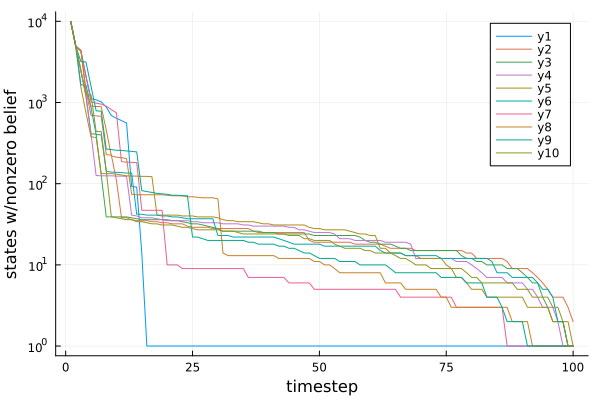

In [152]:
support = [[length(ParticleFilters.probdict(beliefs[run][step])) for step in 1:100] for run in 1:10]
plot(support, yscale=:log10, xlabel = "timestep", ylabel = "states w/nonzero belief")

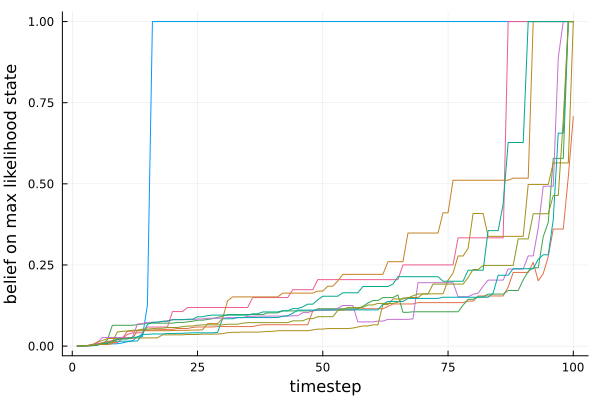

In [153]:
max_vals = [[maximum(values(ParticleFilters.probdict(beliefs[run][step]))) for step in 1:100] for run in 1:10]
plot(max_vals, xlabel = "timestep", ylabel = "belief on max likelihood state", legend=false)